### Task1

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.  
    x-axis: Income. Variable: income  
    y-axis: Life expectancy. Variable: life_exp  
    Bubble Size: Population. Variable: population  
    Bubble Color: Regions. Variable: four_regions  
    Text Annotation: year “2010” in the back of the plot. Variable: year

2. Import the q1data.csv dataset.
3. Recreate the plot as best you can using plotnine.

In [2]:
import pandas as pd
from plotnine import *

In [3]:
q1 = pd.read_csv('q1data.csv')
q1 = q1.dropna(subset=["income","life_exp","population","four_regions"])

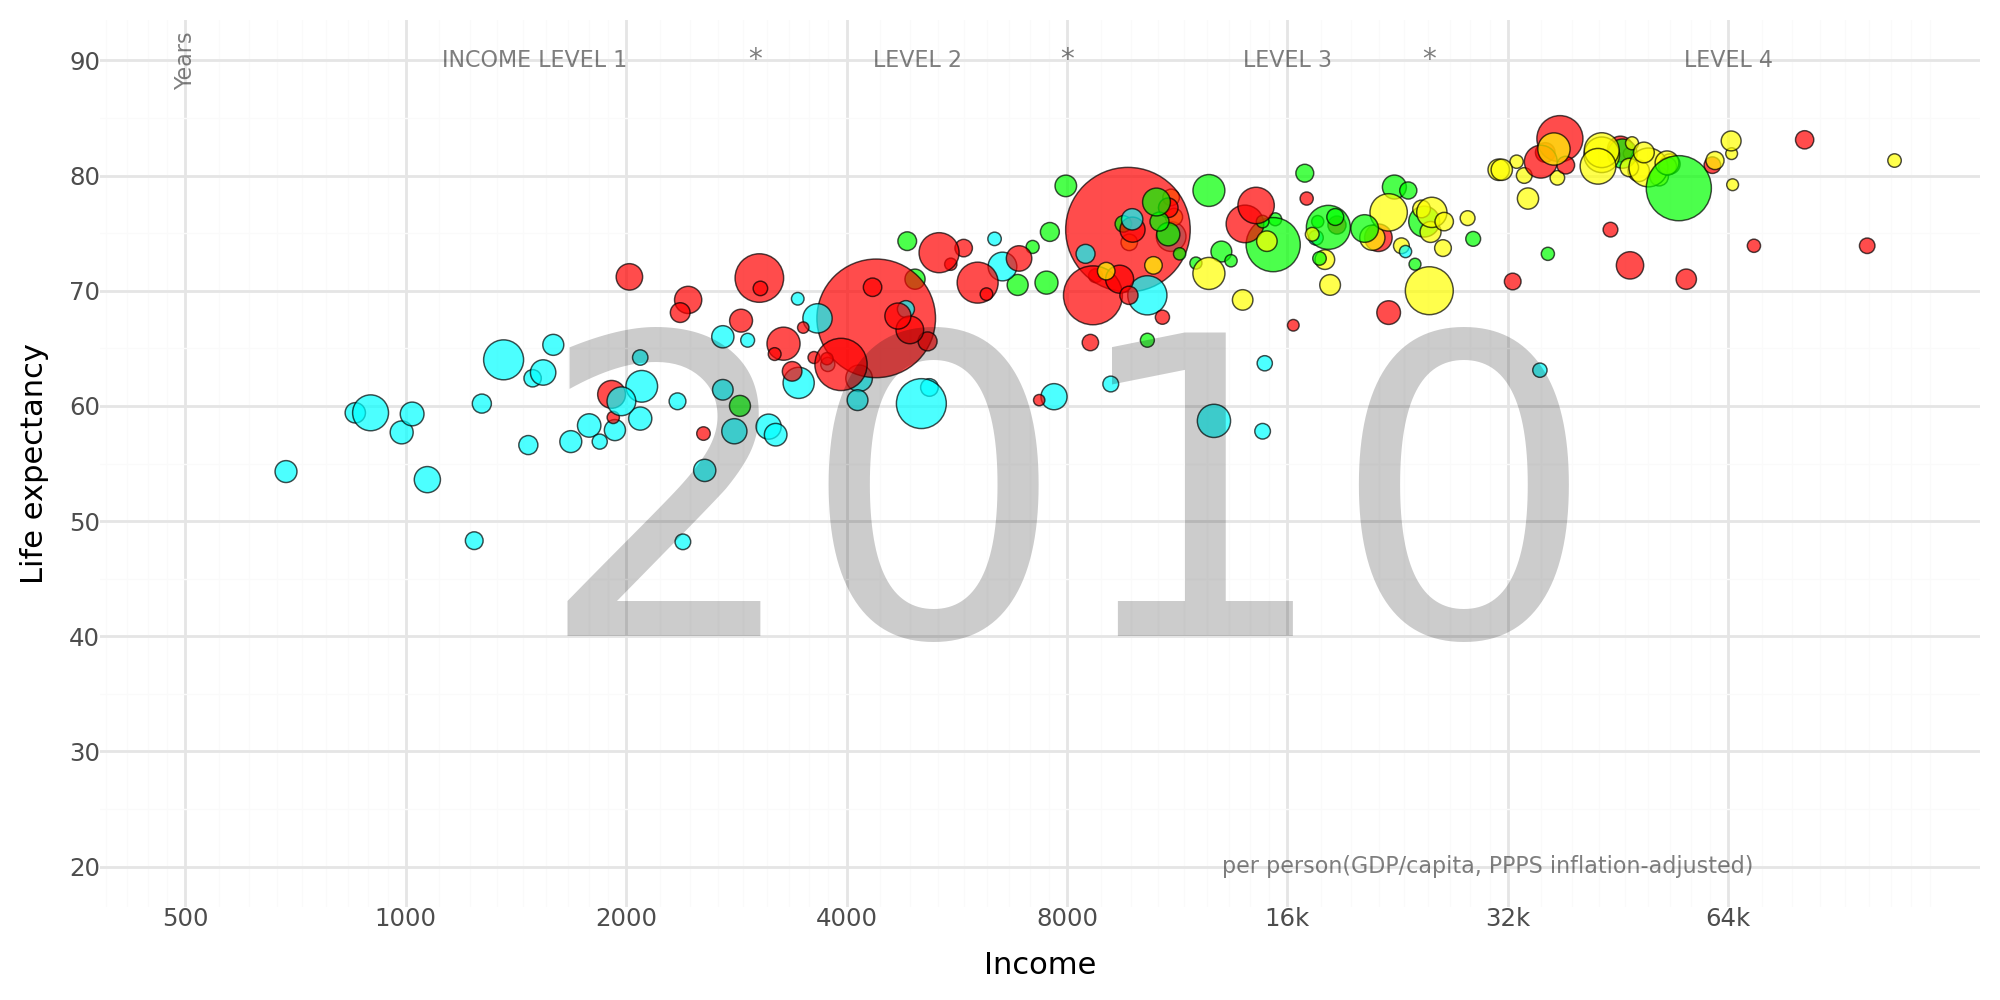

In [8]:
(ggplot(q1,aes(x="income", y="life_exp", size="population", fill="four_regions"))
+ geom_point(alpha=0.7, color="black", stroke=0.3)
+ scale_size(range=(2,25))
+ scale_fill_manual(values={"africa":"cyan","americas":"lime","asia":"red","europe":"yellow"})
+ labs(x="Income", y="Life expectancy")
+ guides(size=False, fill=False)
+ theme_minimal()
+ annotate("text", x=8000, y=50, label =q1["year"].unique(), size=150, color= "black", alpha=0.2)
+ annotate("text", x=1500, y=90, label="INCOME LEVEL 1", size=8, color="black", alpha=0.5)
+ annotate("text", x=5000, y=90, label="LEVEL 2", size=8, color="black", alpha=0.5)
+ annotate("text", x=16000, y=90, label="LEVEL 3", size=8, color="black", alpha=0.5)
+ annotate("text", x=64000, y=90, label="LEVEL 4", size=8, color="black", alpha=0.5)
+ annotate("text", x=30000, y=20, label="per person(GDP/capita, PPPS inflation-adjusted)", size=8, color="black", alpha=0.5)
+ annotate("text", x=3000, y=90, label="*", size=10, color="black", alpha=0.5)
+ annotate("text", x=8000, y=90, label="*", size=10, color="black", alpha=0.5)
+ annotate("text", x=25000, y=90, label="*", size=10, color="black", alpha=0.5)
+ annotate("text", x=500, y=90, label="Years", size=8, color="black", angle=90, alpha=0.5)
+ scale_x_log10(breaks=[500,1000,2000,4000,8000,16000,32000,64000], labels=[500,1000,2000,4000,8000,"16k","32k","64k"])
+ scale_y_continuous(breaks=[20,30,40,50,60,70,80,90], limits=(20, 90)) 
+ theme(figure_size=(10, 5))
)


4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.  
  
    I used a density plot to show the distribution of income for four different regions. Compared to the bubble plot, the density plot gives a much clearer picture of the overall distribution and trends within each region. It allows us to see the shape of the data, highlighting tendencies and variations across regions. However, one of the limitations is that we can't include life expectancy or other additional variables in the density plot .

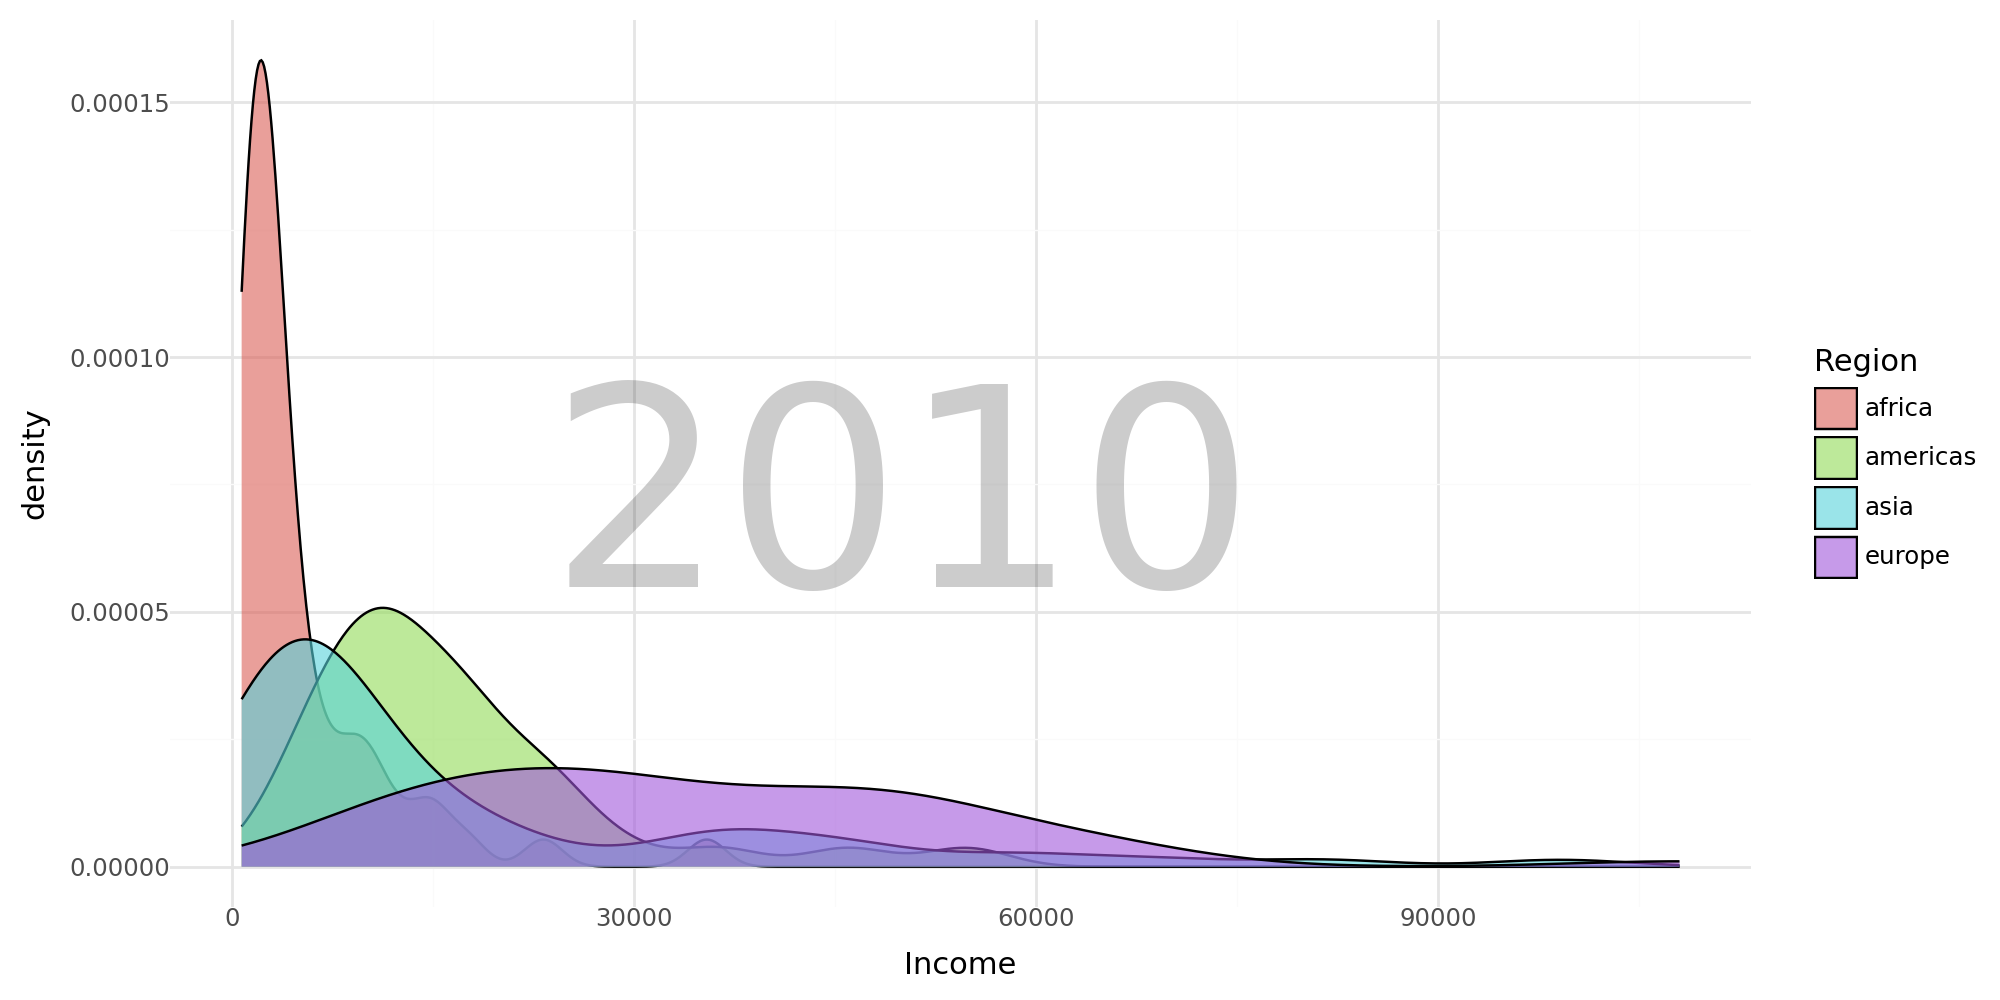

In [9]:
(ggplot(q1,aes(x="income", fill="four_regions"))
+ geom_density(alpha=0.6)
+ labs(x="Income", fill='Region')
+ theme_minimal()
+ annotate("text", x=50000, y=0.00007, label =q1["year"].unique(), size=100, color= "black", alpha=0.2)
+ theme(figure_size=(10, 5))
)

### Task2
1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.  
    x-axis: Exports. Variable: exports  
    y-axis: Imports. Variable: imports  
    Bubble Size: Energy. Variable: energy  
    Bubble Color: Regions. Variable: four_regions  
    Text Annotation: year “1997” in the back of the plot. Variable: year

2. Import the q2data.csv dataset.
3. Recreate the plot as best you can using plotnine.

In [12]:
q2 = pd.read_csv('q2data.csv')
q2 = q2.dropna(subset=["exports","imports","energy","four_regions"])
q2['energy']=q2['energy'].str.replace('k','').astype(float)*1000
q2['energy']=q2['energy'].astype(float)

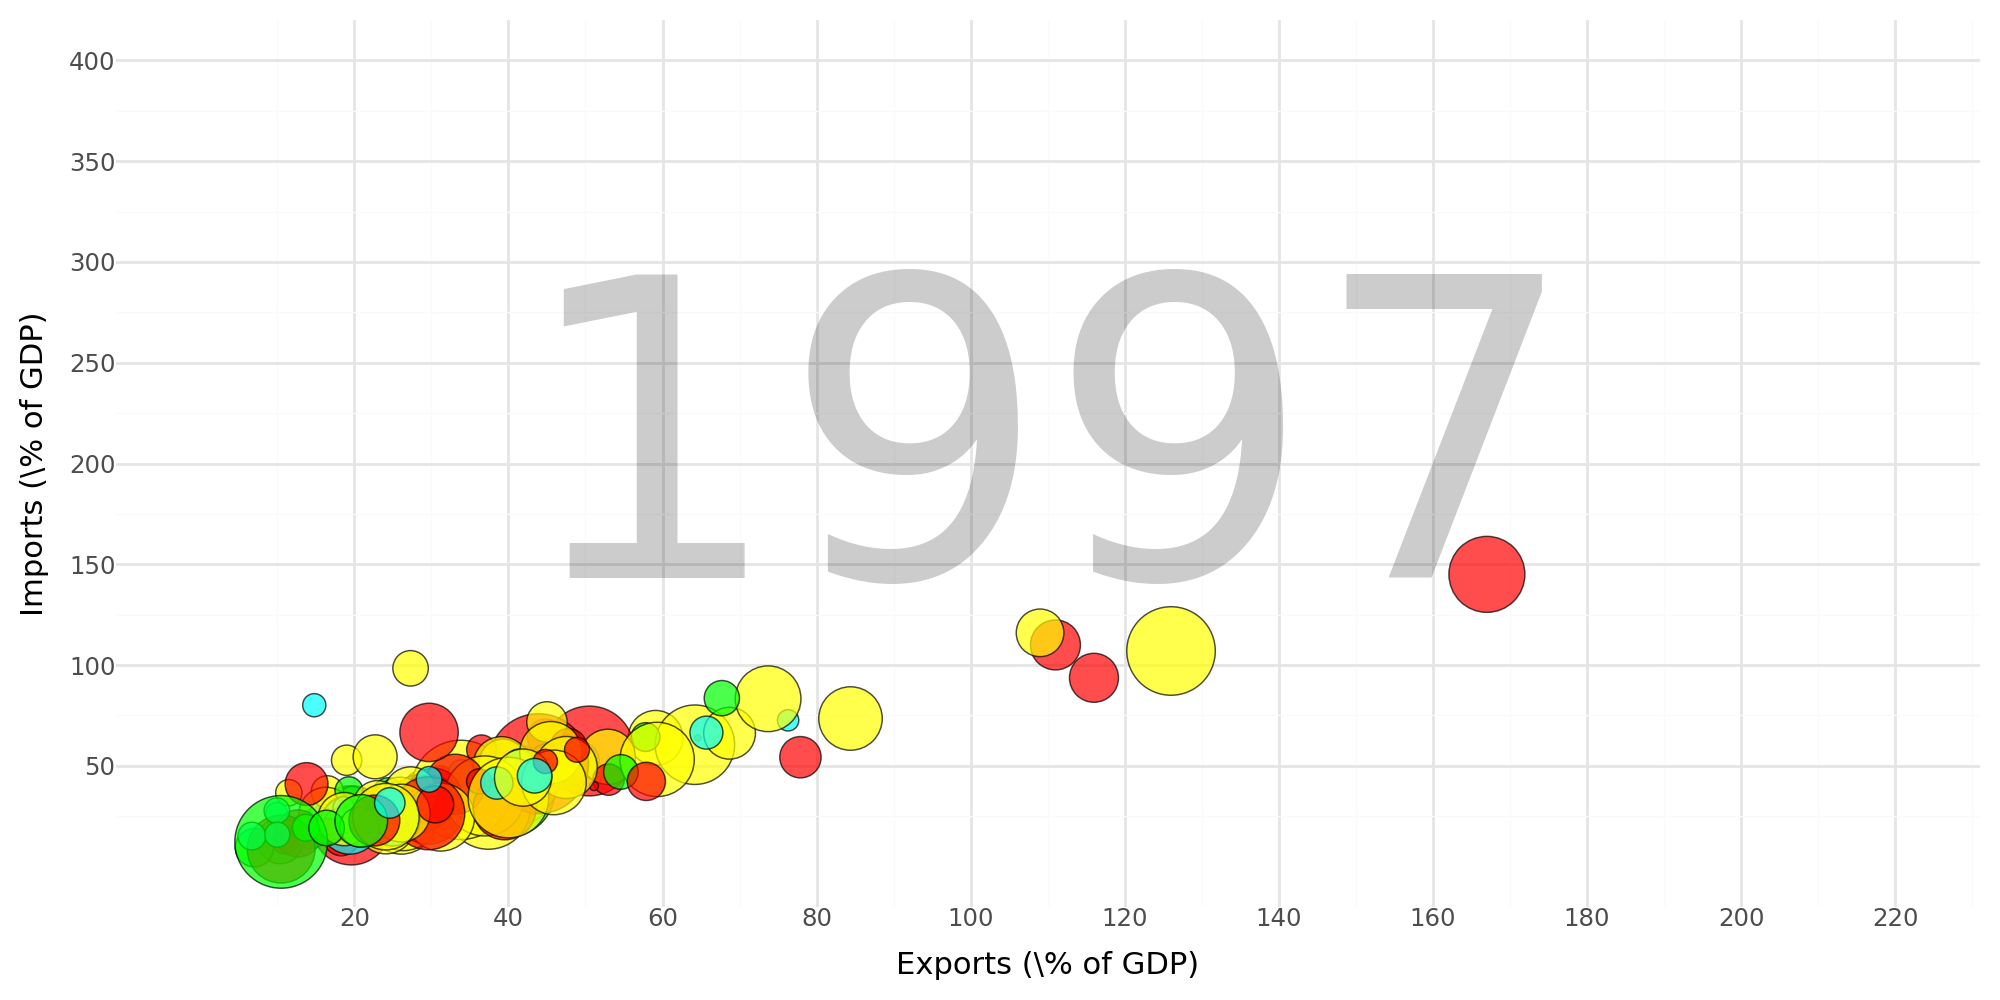

In [27]:
(ggplot(q2,aes(x="exports", y="imports", size="energy", fill="four_regions"))
+ geom_point(alpha=0.7, color="black", stroke=0.3)
+ scale_size(range=(1,20))
+ scale_fill_manual(values={"africa":"cyan","americas":"lime","asia":"red","europe":"yellow"})
+ labs(x=r"Exports (\% of GDP)", y=r"Imports (\% of GDP)")
+ guides(size=False, fill=False)
+ theme_minimal()
+ annotate("text", x=110, y=200, label =q2["year"].unique(), size=150, color= "black", alpha=0.2)
+ scale_x_continuous(breaks=[20,40,60,80,100,120,140,160,180,200,220], limits=(0, 220))
+ scale_y_continuous(breaks=[50,100,150,200,250,300,350,400], limits=(0, 400))
+ theme(figure_size=(10, 5))
)



4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.  
  
    I used a tile plot to present the relationship between exports and imports, with the energy level shown using different colors. A downside of the tile plot is that it lacks the ability to distinguish between different regions like a bubble plot would. However, the advantage is that it provides a clear visualization of the correlation between the two variables with the energy level effectively represented by color, making it easy to see how their values are distributed across the plot.

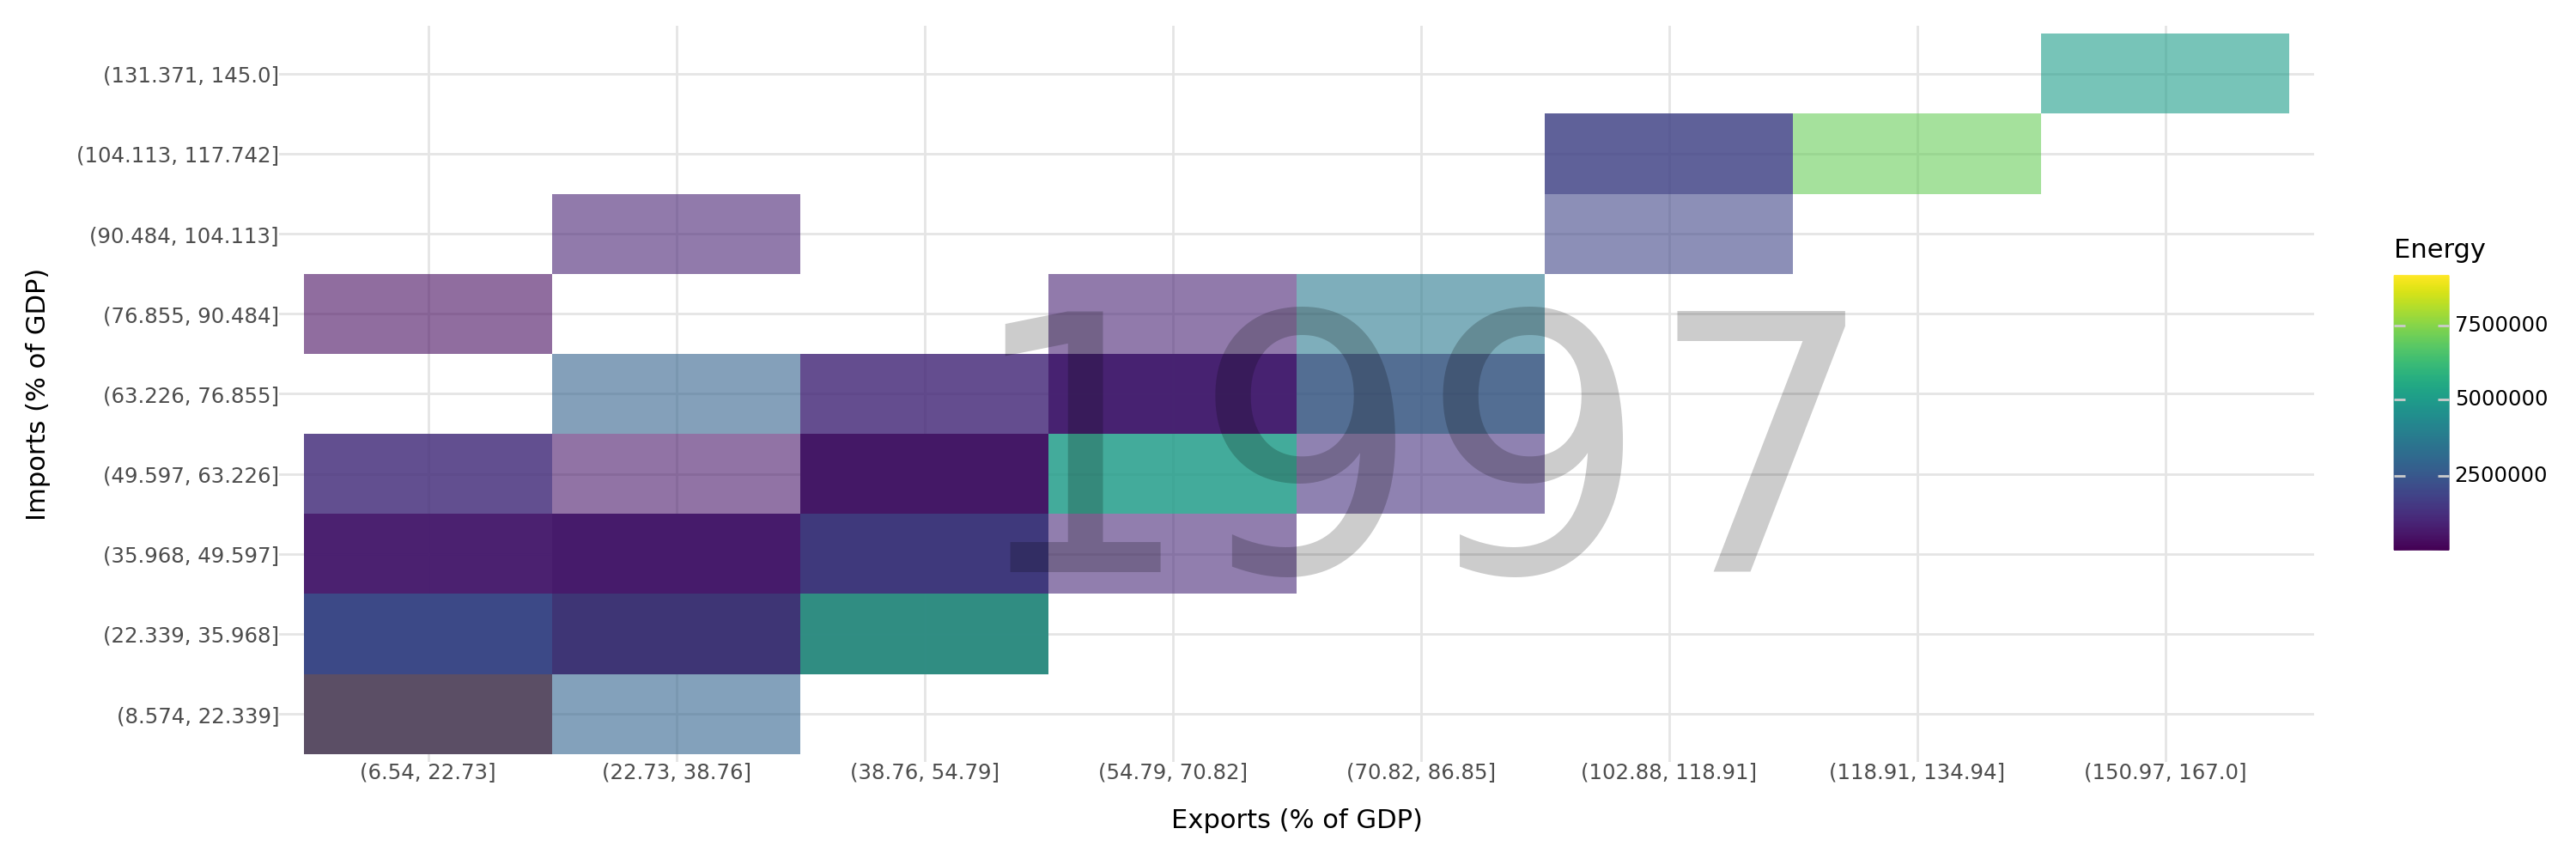

In [21]:
q2["exports_bin"] = pd.cut(q2["exports"],10)
q2["imports_bin"] = pd.cut(q2["imports"],10)
(ggplot(q2,aes(x="exports_bin", y="imports_bin", fill="energy"))
+ geom_tile(alpha=0.6)
+ labs(x="Exports (% of GDP)", y="Imports (% of GDP)", fill="Energy")
+ annotate("text", x=5, y=4, label =q2["year"].unique(), size=150, color= "black", alpha=0.2)
+ theme_minimal()
+ theme(figure_size=(15, 5))
)

### Task3
1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.  
    x-axis: Individuals using the Internet. Variable: internet_users  
    y-axis: GDP/capita. Variable: gdp  
    Bubble Size: Income. Variable: income  
    Bubble Color: Region. Variable: four_regions  
    Text Annotation: year “2001” in the back of the plot. Variable: year

2. Import the q3data.csv dataset.
3. Recreate the plot as best you can using plotnine.

In [18]:
q3 = pd.read_csv('q3data.csv')
q3 = q3.dropna(subset=["internet_users","gdp","income","four_regions"])

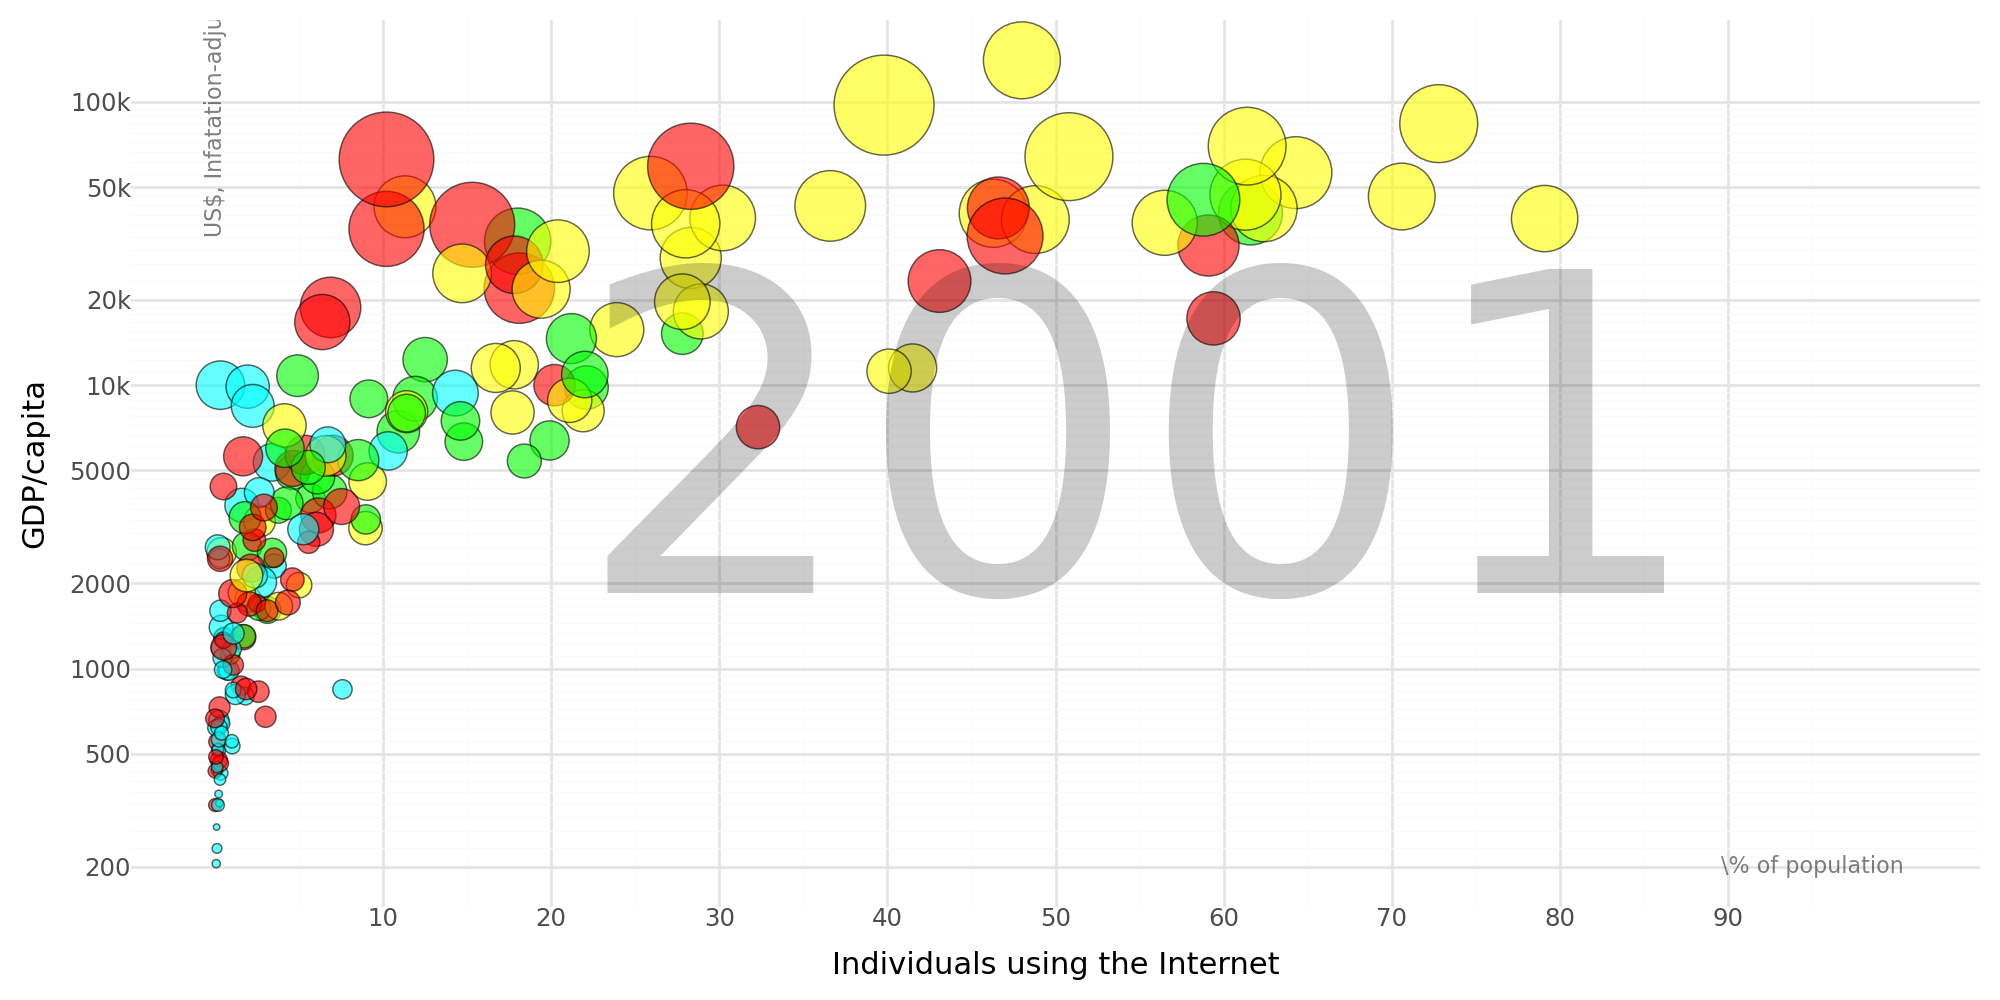

In [26]:
(ggplot(q3,aes(x="internet_users", y="gdp", size="income", fill="four_regions"))
+ geom_point(alpha=0.6, color="black", stroke=0.3)
+ scale_size(range=(1,20))
+ scale_fill_manual(values={"africa":"cyan","americas":"lime","asia":"red","europe":"yellow"})
+ labs(x="Individuals using the Internet", y="GDP/capita")
+ guides(size=False, fill=False)
+ theme_minimal()
+ annotate("text", x=55, y=5000, label =q3["year"].unique(), size=160, color= "black", alpha=0.2)
+ annotate("text", x=95, y=200, label=r"\% of population", size=8, color="black", alpha=0.5)
+ annotate("text", x=0, y=100000, label="US$, Infatation-adjusted", size=8, color="black", angle=90, alpha=0.5)
+ scale_y_log10(breaks=[200,500,1000,2000,5000,10000,20000,50000,100000],labels=[200,500,1000,2000,5000,"10k","20k","50k","100k"])
+ scale_x_continuous(breaks=[10,20,30,40,50,60,70,80,90], limits=(0, 100))
+ theme(figure_size=(10, 5))
)


4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.  
  
    I used the facet-wrapped boxplot to present the data. Although it doesn't allow us to compare income, it shows the range of internet user rates within each region and highlights GDP outliers. It also allows for an easy comparison of the box shapes across regions to give insight into the spread and distribution between regions.

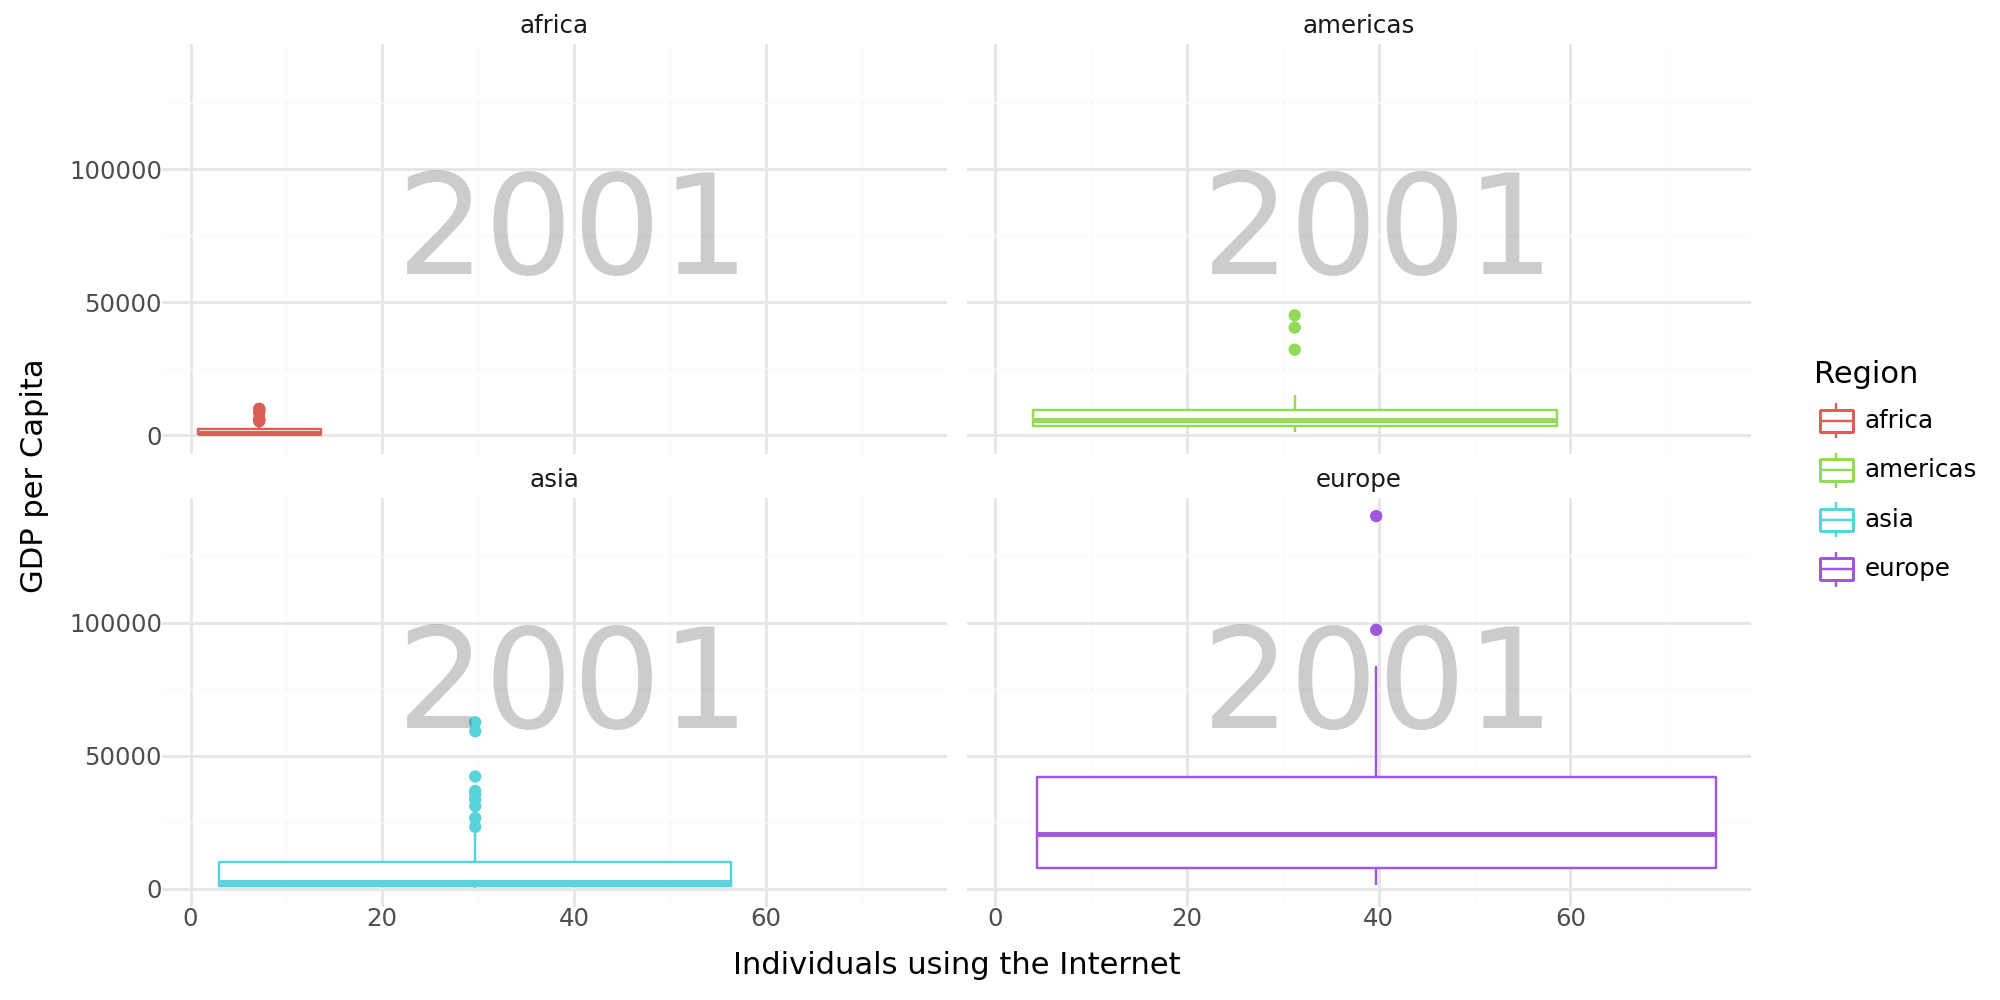

In [20]:
(ggplot(q3, aes(x = "internet_users", y = "gdp"))
  + geom_boxplot(aes(color = "four_regions"))
  + labs(x = "Individuals using the Internet", y = "GDP per Capita", size = "Income",color = "Region")
  + annotate("text", x=40, y=75000, label =q3["year"].unique(), size=50, color= "black", alpha=0.2)
  + theme_minimal()
  + facet_wrap("four_regions")
  + theme(figure_size=(10, 5))
)


### Sources
Assistance was provided by ChatGPT for guidance on coding functions and code fixing.